# Problem statment: To predict customer churn (whether a customer will leave the service or not) based on their historical usage patterns.

Aim:A telecom company wants to predict customer churn (whether a customer will leave the service or not) based on their historical usage patterns. You will first build a Single-Layer Perceptron (SLP) to classify customers, observe its limitations, and then improve performance using a Multi-Layer Perceptron (MLP).

Requirements:Dataset:- https://github.com/ramar92/Deep-Learning-Datasets/blob/main/Telco-Customer-Churn.csv  

•	Python 3.x

•	NumPy

•	Pandas

•	Scikit-learn

•	TensorFlow/Keras

•	Matplotlib (optional for visualization)

Procedure:Load the dataset from GitHub.

•	Preprocess the data (handle categorical variables, missing values).

•	Split the data into training and test sets.

•	Build and train an SLP (Single-Layer Perceptron).


In [1]:
|import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


Step 1: Loading dataset

In [2]:
#  Load Dataset
url = "https://raw.githubusercontent.com/ramar92/Deep-Learning-Datasets/refs/heads/main/Telco-Customer-Churn.csv"
df = pd.read_csv(url)
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


step 2 data cleaning

In [3]:
# data cleaning
df.dropna(inplace=True)  # drop missing values
df.drop('customerID', axis=1, inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)


step 3 Encoding Categorical Features

In [4]:
# Encoding Categorical Features
for column in df.select_dtypes(include=['object']).columns:
    if column != 'Churn':
        df[column] = LabelEncoder().fit_transform(df[column])

df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})


step 4 Feature Scaling and splitting

In [5]:
# Feature Scaling and Splitting
X = df.drop('Churn', axis=1)
y = df['Churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Step 5 Build and Train Single-Layer Perceptron (SLP)

In [6]:
# Build and Train Single-Layer Perceptron (SLP)
model_slp = Sequential()
model_slp.add(Dense(1, input_dim=X_train.shape[1], activation='sigmoid'))

model_slp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_slp = model_slp.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, validation_split=0.1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


step 6 Evaluate SLP

In [7]:
#  Evaluate SLP
print("\nSLP Accuracy:")
slp_preds = (model_slp.predict(X_test) > 0.5).astype("int32")
print(accuracy_score(y_test, slp_preds))
print(classification_report(y_test, slp_preds))



SLP Accuracy:
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
0.7896233120113717
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



step 7 Build and Train Multi-Layer Perceptron (MLP)

In [8]:
# Build and Train Multi-Layer Perceptron (MLP)
model_mlp = Sequential()
model_mlp.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model_mlp.add(Dense(16, activation='relu'))
model_mlp.add(Dense(1, activation='sigmoid'))

model_mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_mlp = model_mlp.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, validation_split=0.1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


step 8 Evaluate MLp

In [9]:
#  Evaluate MLP
print("\nMLP Accuracy:")
mlp_preds = (model_mlp.predict(X_test) > 0.5).astype("int32")
print(accuracy_score(y_test, mlp_preds))
print(classification_report(y_test, mlp_preds))



MLP Accuracy:
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
0.7818052594171997
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.61      0.49      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



step 9 Compare Validation Accuracy

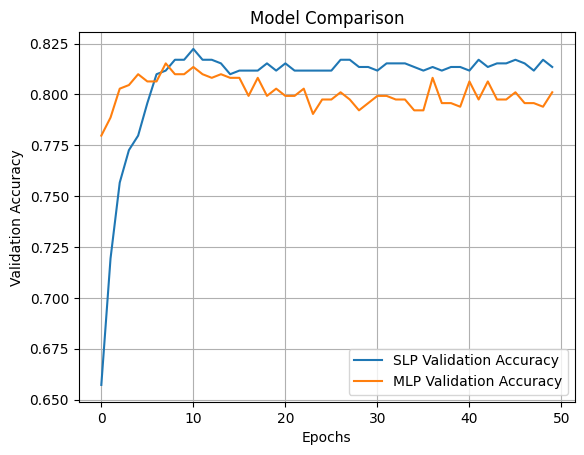

In [10]:
# Compare Validation Accuracy
plt.plot(history_slp.history['val_accuracy'], label='SLP Validation Accuracy')
plt.plot(history_mlp.history['val_accuracy'], label='MLP Validation Accuracy')
plt.title('Model Comparison')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()
